In [1]:
import fastai, pathlib

In [2]:
import fastai.vision as vision

In [3]:
chrono_images_path = pathlib.Path('/notebooks/WatchProj/data')

In [4]:
image_list = vision.ImageList.from_folder(chrono_images_path)

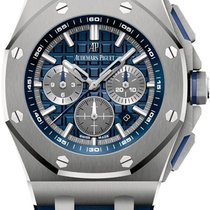

In [8]:
image_list[0]

In [9]:
data = (
    vision.ImageList.from_folder(chrono_images_path)
    .split_by_rand_pct()
    .label_from_re(r'.*\/.+-.+-(.*).jpg', label_cls=vision.FloatList)
    .transform(vision.get_transforms())
    .databunch()
    .normalize(vision.imagenet_stats)
)

### Difference Between Regression & Classification (Models) Data Preprocessing Pipelines
- example filename: `omega-167-7493.jpg`
- for a classification model, `omega`, is the desired regular expression
- for a regression model, however, the integer data: `7493` (the price), is the desired regular expression
- `label_cls=vision.FloatList` tells fastai to recognize the numeric labels as actual float values and not as strings (strings being the default option)

In [10]:
data

ImageDataBunch;

Train: LabelList (3135 items)
x: ImageList
Image (3, 210, 210),Image (3, 210, 210),Image (3, 210, 210),Image (3, 210, 210),Image (3, 210, 210)
y: FloatList
29800.0,65000.0,93355.0,77000.0,26500.0
Path: /notebooks/WatchProj/data;

Valid: LabelList (783 items)
x: ImageList
Image (3, 210, 210),Image (3, 210, 210),Image (3, 210, 210),Image (3, 210, 210),Image (3, 210, 210)
y: FloatList
17650.0,5681.0,3000.0,4085.0,3795.0
Path: /notebooks/WatchProj/data;

Test: None

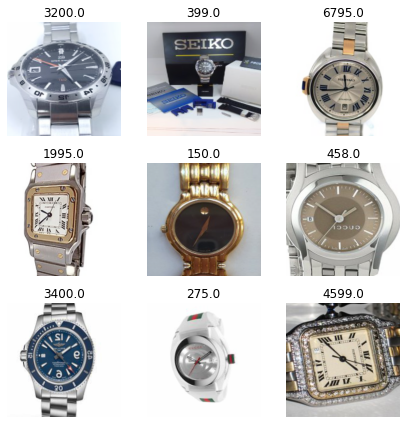

In [11]:
data.show_batch(3, figsize=(6,6))

### Model Construction
- learner is the same for both regression and classification models

In [12]:
learn = vision.cnn_learner(data, vision.models.resnet34, metrics=vision.error_rate)

### Difference Between Regression & Classification (Models) Loss Functions
- the loss function, however, is different: **regression models require the MSE loss function**
- again, the loss function is what the model uses to evaluate how well it's making predictions on new, unseen data (from the validation set)
- in classification, the goal is to simply reduce the errors in classification
- regression deals with discrete numbers, so the model is likely never going to be exactly correct about a prediction
- being a couple dollars off compared to a thousand dollars off is extremely good
- regression is not a binary right and wrong like classification, but instead, a matter of closeness
---
- MSE = mean squared error | goal is to reduce error value distance between prediction and label
- "squared" because a negative distance and a positive distance of identical numeric values must be held equally accountable

In [13]:
learn.loss_func = vision.MSELossFlat()

In [14]:
learn.fit_one_cycle(20)

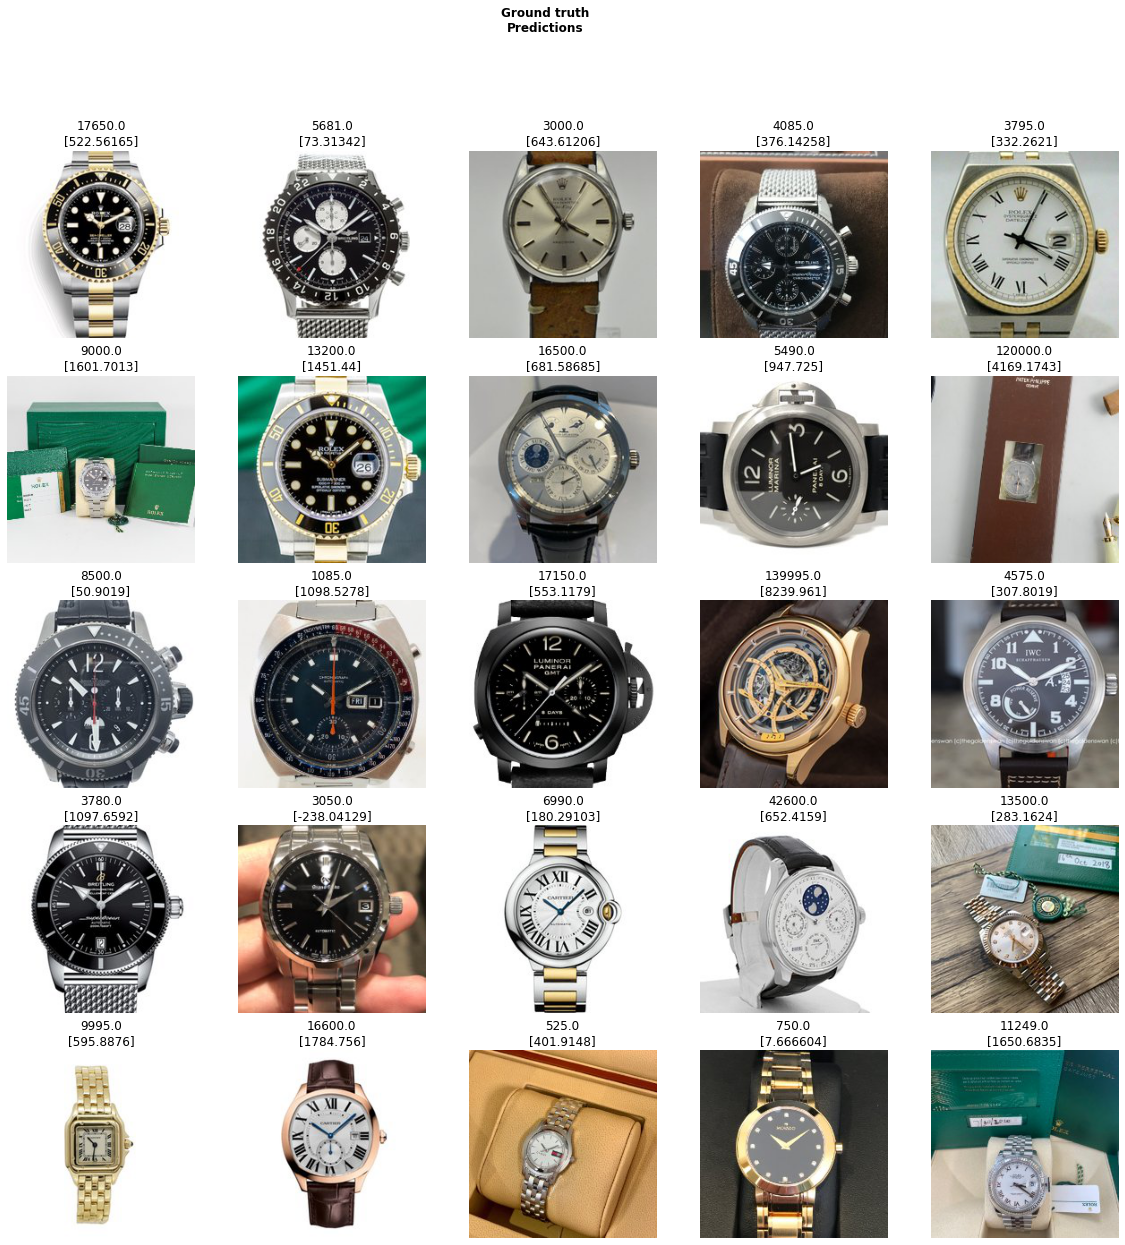

In [15]:
learn.show_results()

- validation loss going down, however the model still needs to be trained a lot more as it is extremely inaccurate
- bumping up the learning rate my help

In [16]:
learn.fit_one_cycle(20, max_lr=slice(1e-2,1e-4)) 

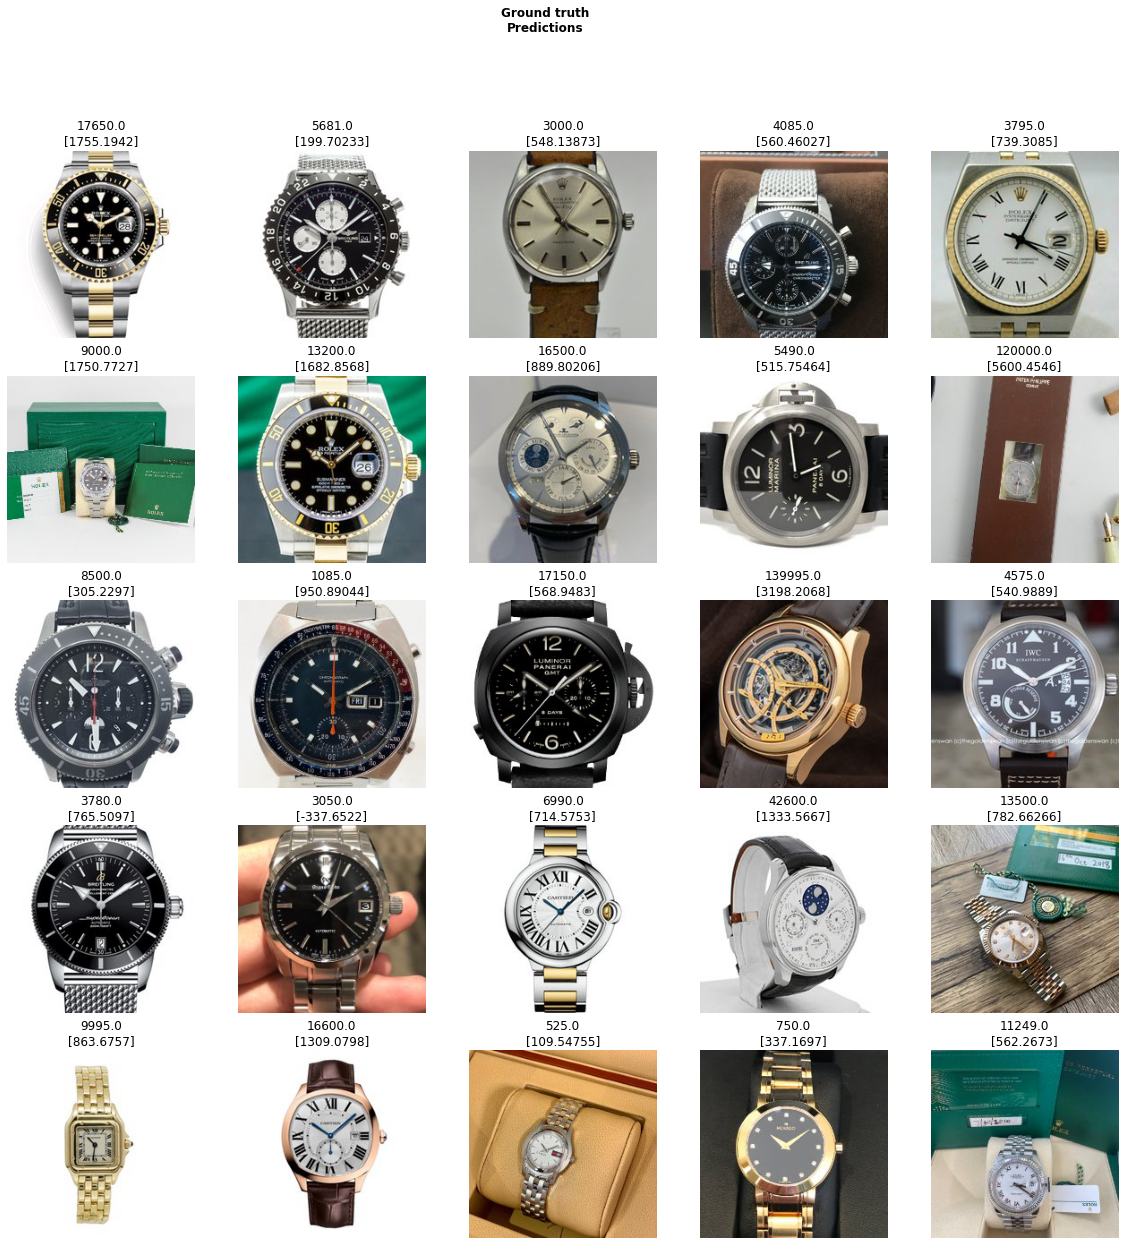

In [17]:
learn.show_results()

- the results are looking better, but even more training should yield good improvement

In [18]:
learn.fit_one_cycle(50, max_lr=slice(1e-2,1e-4)) 

- the validation loss is oscillating, which is not good
- this can happen when the learning rate is steep and the validation set is small

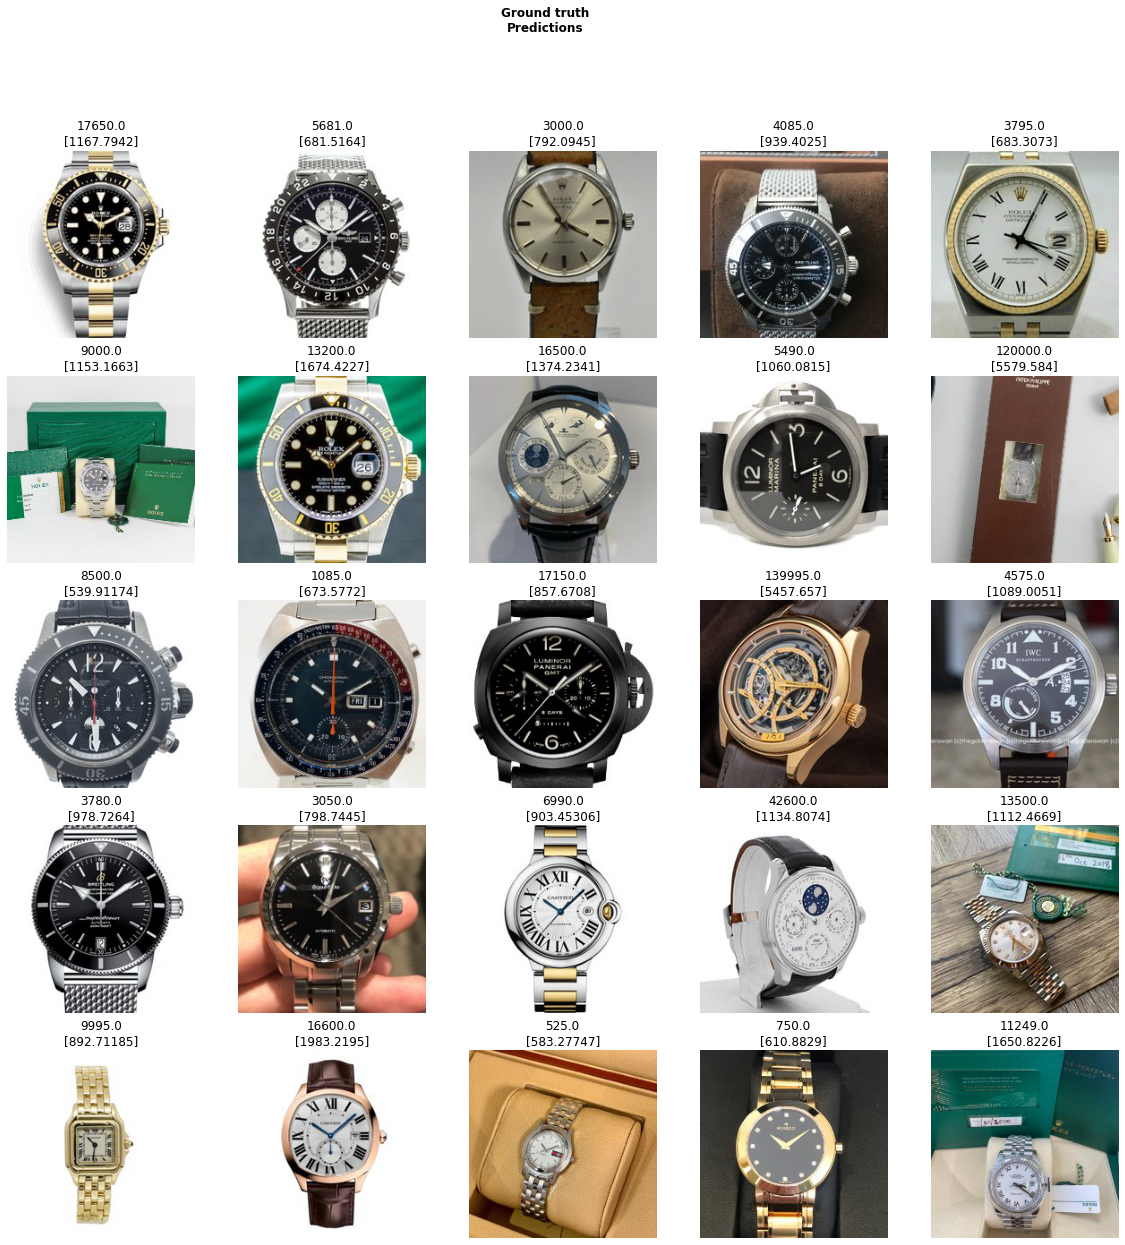

In [20]:
learn.show_results()

- these results are a slight improvement from last `learn.show_results()`
- for now, export the model

In [21]:
learn.export('regression.pkl')